In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.neighbors import NearestNeighbors
import bigfloat
from decimal import *
import methods


# Lorentz equations

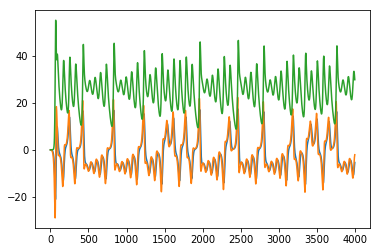

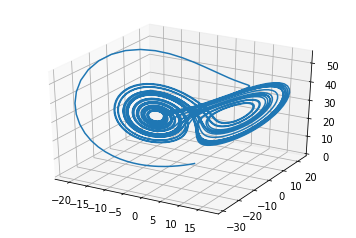

In [2]:
# Parameters
T=4000 #sequence size
sigma=10
beta=8/3
rho=28
dt=0.01

x=np.zeros((T+1))
y=np.zeros((T+1))
z=np.zeros((T+1))
x[0]=0.2*(np.random.rand()-0.5)
y[0]=0.2*(np.random.rand()-0.5)
z[0]=0.2*(np.random.rand()-0.5)

for i in range(T):
    x[i+1]=x[i]+dt*sigma*(y[i]-x[i])
    y[i+1]=y[i]+dt*(x[i]*(rho-z[i])-y[i])
    z[i+1]=z[i]+dt*(x[i]*y[i]-beta*z[i])

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)
ax.plot(z)

fig2=plt.figure()
ax2=fig2.add_subplot(111,projection='3d')
ax2.plot(x,y,z)

In [46]:
def example(X,Y,T,tau,E,L,emsemble):
    rhox=np.zeros((len(L),emsemble))
    rhoy=np.zeros((len(L),emsemble))
    for i in range(len(L)):
        for j in range (emsemble):
            y_pred, y_target, x_pred, x_target = methods.compute_xmap(X,Y,T,E,tau,L[i])
            rhox[i,j]=methods.compute_corr(y_pred,y_target)
            rhoy[i,j]=methods.compute_corr(x_pred,x_target)
    rhox=np.mean(rhox,1)
    rhoy=np.mean(rhoy,1)
    return rhox,rhoy,L

In [5]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50

rhox, rhoy, L=example(x,y,T,tau,E,L,emsemble)


TypeError: compute_xmap() takes exactly 6 arguments (7 given)

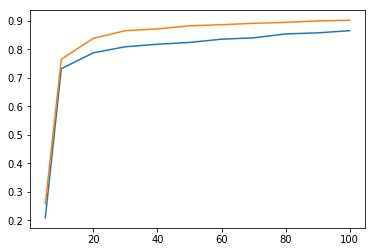

In [5]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoy)

In [6]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50

rhox, rhoz, L=example(x,z,T,tau,E,L,emsemble)

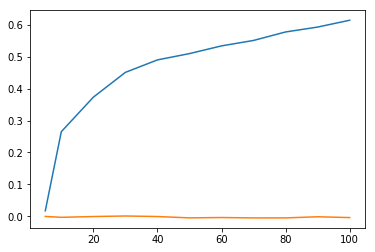

In [7]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoz)

In [8]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50

rhoy, rhoz, L=example(y,z,T,tau,E,L,emsemble)

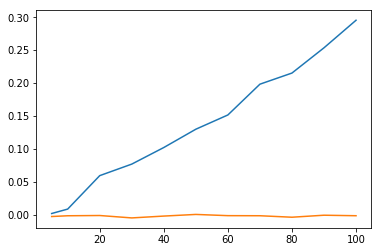

In [9]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhoy)
ax2.plot(L,rhoz)

From this test it is possible to see that from the variable z it is not possible to predict x and y. This is due to the fact the x and y are multiplying each other in the z variable which makes it hard to seperate the effect of each of this variables. Which is what we were expecting from the literature. 

## Ephemeral regimes in a coupled dynamic system

In [77]:
# Parameters
T=8000
E=3
tau=1
rx=3.8
ry=3.5
betaxy=0.02 # how much y influences x
betayx=0.1 # how much x influences y 

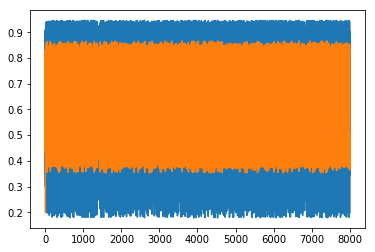

In [78]:
x=np.zeros((T))
y=np.zeros((T))
x[0]=0.4
y[0]=0.2

for i in range(T-1):
    x[i+1]=x[i]*(rx-rx*x[i]-betaxy*y[i])
    y[i+1]=y[i]*(ry-ry*y[i]-betayx*x[i])

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)

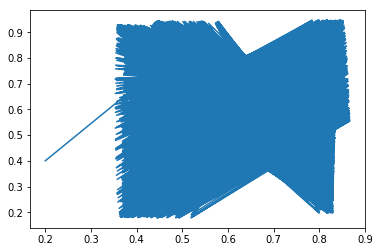

In [79]:
fig=plt.figure()
plt.plot(y,x)


In [80]:
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000, 1500, 2000, 2500, 3000]
emsemble=50 

rhox, rhoz, L=example(x,y,T,tau,E,L,emsemble)

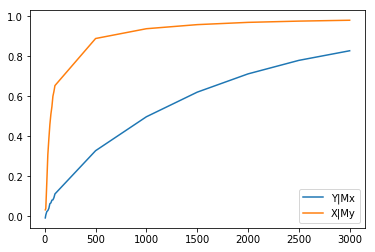

In [81]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoz)
plt.legend(('Y|Mx','X|My'))

## External forcing of non-coupled variables 

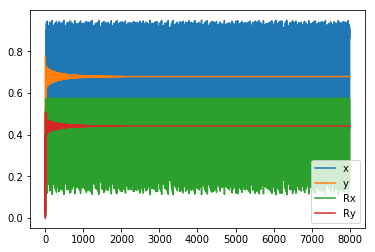

In [74]:
T=8000
x=np.zeros((T+1))
y=np.zeros((T+1))
Rx=np.zeros((T+1))
Ry=np.zeros((T+1))
n=1

x[0]=np.random.rand()
y[0]=np.random.rand()

for i in range(T):
    Rx[i+1]=x[i]*(3.1*(1-x[i]))*np.exp(-0.3*n)
    Ry[i+1]=y[i]*(2.9*(1-y[i]))*np.exp(-0.36*n)
    if i < 3:
        x[i+1]=0.4*x[i]
        y[i+1]=0.35*y[i]
    else:
        x[i+1]=0.4*x[i]+np.max(Rx[i-3],0)
        y[i+1]=0.35*y[i]+np.max(Ry[i-3],0)
        
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)
ax.plot(Rx)
ax.plot(Ry)
plt.legend(('x','y','Rx','Ry'))

In [75]:
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50 
tau=1
E=3

rhox, rhoz, L=example(x,y,T,tau,E,L,emsemble)

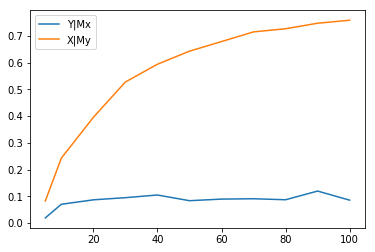

In [76]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoz)
plt.legend(('Y|Mx','X|My'))